<hr style="height:5px;border-width:2;color:gray;background-color:#000000"> 
<center><h1>CS 144 - Winter 2024 - Linear-Time Construction of Suffix Arrays</h1></center>
<center><h1>Due: Sunday, March 17th, 2024 @ 11:59pm</h1></center>

### Enter your information below:

<div style="color: #000000;background-color: #EEEEFF">
    Your Name (submitter): Josue Vargas <br>
    Your student ID (submitter): 862233763
<br>
<br>
<b>By submitting this notebook, I assert that the work below is my own work, completed for this course.  Except where explicitly cited, none of the portions of this notebook are duplicated from anyone else's work or my own previous work.</b>
<br>    
<br>
<b>Instruction for submissions:</B> when you have completed this project, download this .ipynb file to your computer by left-clicking on the file name, and submit to <a href="https://elearn.ucr.edu/">Canvas</A> by the deadline. 
<br>
<br>
<B>Late work:</B> There is no late deadline for the final project, except for the most serious circumstances (illness, medical emergency, etc.) which have to be documented.
</div>


<hr style="height:5px;border-width:2;color:gray;background-color:#000000"> 
<center><h1>The Skew algorithm</h1></center>
<br>
In this project you will implement the construction of suffix arrays in linear-time. This algorithm was <B>not</B> explained in class. Part of this project is to understand how the algorithm works before starting the implementation.  Here is some resources:
<UL>
    <li><A HREF="https://www.cs.cmu.edu/~guyb/realworld/papersS04/KaSa03.pdf">The paper in which the algorithm was originally proposed (includes C code)</A></li>
    <li><A HREF="http://www.mi.fu-berlin.de/wiki/pub/ABI/SS13Lecture3Materials/script.pdf">Another description of the algorithm (notation heavy) with an example</A></li>
    <li><A HREF="https://gist.github.com/markormesher/59b990fba09972b4737e7ed66912e044">An example</A></li>
    <li><A HREF="https://github.com/vikasawadhiya/DC3-Algorithm/blob/main/DC3AlgorithmTutorial.pdf">Another example, developed all the way</A>
    <li><A HREF="https://www.cs.cmu.edu/~ckingsf/bioinfo-lectures/suffixarrays.pdf">Carl's slide (CMU)</A></li>
    <li><A HREF="http://rob-p.github.io/CSE549F17/lectures/Lec05.pdf">Rob's slides (Stony Brook)</A></li>
    <li><A HREF="https://mailund.dk/posts/skew-python-go/">Thomas Mailund's post on Skew in GO and Python</A>
    <li><A HREF="https://www.youtube.com/watch?v=XiuSW_mEn7g">Radix Sort Algorithm Introduction in 5 Minutes</A></li>
    <li><A HREF="https://www.youtube.com/watch?v=OKd534EWcdk">Learn Counting Sort Algorithm in LESS THAN 6 MINUTES!</A></li>
    <li><A HREF="https://www.youtube.com/watch?v=T8XgD40I6uE">COMP526 6-7 §6.6 Linear-time suffix sorting</A></li>
    <li><A HREF="https://www.youtube.com/watch?v=phErzt2C9g8">COMP526 6-8 §6.6 Linear time suffix sorting (part 2)</A></li>
    <li>Use <A HREF="https://www.google.com/search?q=suffix+array+linear+time+construction">Google</A> for more</li>
</UL>

Goals:
<UL>
    <LI>Write a working (bug-free) Python3 implementation of the Skew algorithm in JupyterHub that runs in linear time</LI>
    <LI>Make sure that the output of your implementation matches the output for the naive/slow implementation that we developed in homework 3</LI>
    <LI>Collect experimental results on running your implementation for larger and larger inputs, say 1000, 2000, 5000, 10000, 100000 symbols, and plot the running time as a function of the input size</LI>
    <LI>Compare the performance of your methods against with some <A HREF="https://louisabraham.github.io/notebooks/suffix_arrays.html">fast Python implementations</A></li>
</UL>

You just need to compute the suffix array, not the LCP (longest common prefix) array.
You are allowed to study C/C++ code, but you have to write your own Python code. It is mandatory to acknowledge sources.


Size     | Algorithm | Time (seconds)
1000     | Naive     | 0.008000 seconds
1000     | Fast      | 0.008000 seconds
1000     | Skew      | 0.013000 seconds
1000: (naive, skew, and fast) match

Size     | Algorithm | Time (seconds)
2000     | Naive     | 0.033000 seconds
2000     | Fast      | 0.021000 seconds
2000     | Skew      | 0.024000 seconds
2000: (naive, skew, and fast) match

Size     | Algorithm | Time (seconds)
5000     | Naive     | 0.245000 seconds
5000     | Fast      | 0.140000 seconds
5000     | Skew      | 0.056000 seconds
5000: (naive, skew, and fast) match

Size     | Algorithm | Time (seconds)
10000    | Naive     | 1.167000 seconds
10000    | Fast      | 0.198000 seconds
10000    | Skew      | 0.112000 seconds
10000: (naive, skew, and fast) match

Size     | Algorithm | Time (seconds)
15000    | Naive     | 2.924000 seconds
15000    | Fast      | 0.349000 seconds
15000    | Skew      | 0.162000 seconds
15000: (naive, skew, and fast) match

Size     | Algorithm | 

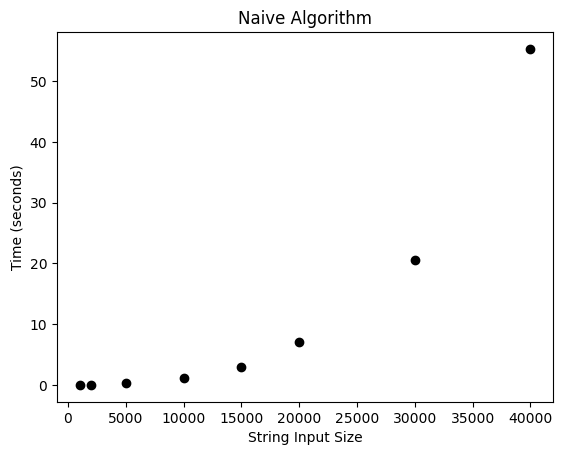

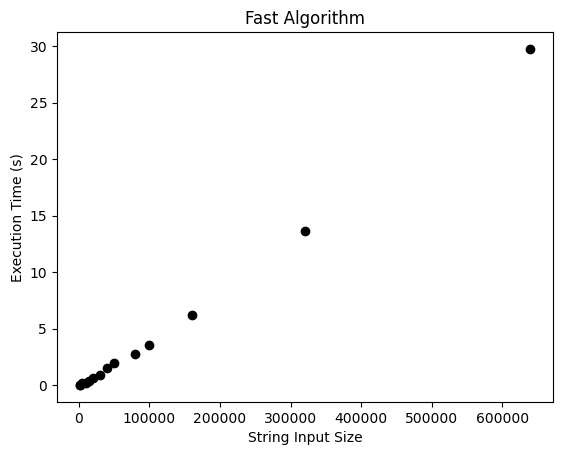

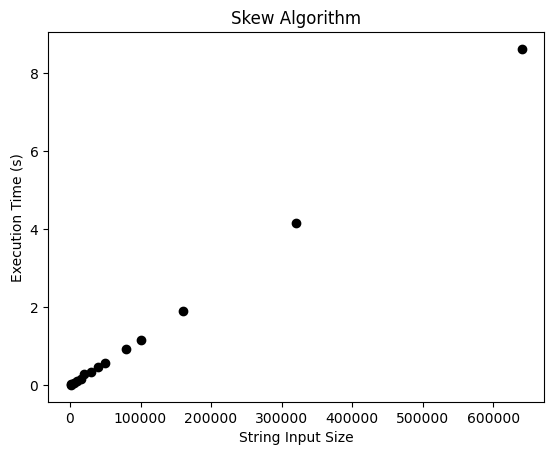

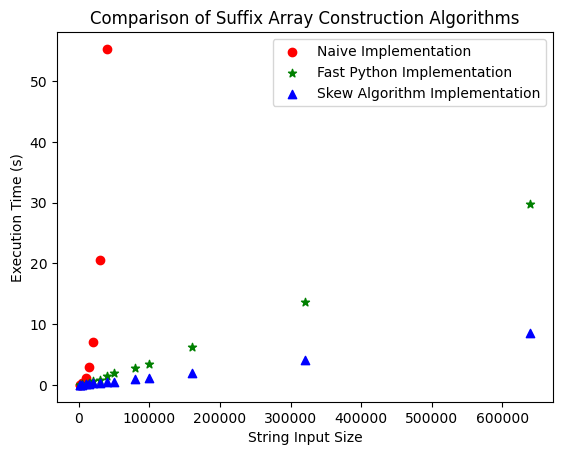

String Input Size    Naive Time (s)    Fast Python Time (s)    Skew Time (s)
1000                 0.008000          0.008000                 0.013000     
2000                 0.033000          0.021000                 0.024000     
5000                 0.245000          0.140000                 0.056000     
10000                1.167000          0.198000                 0.112000     
15000                2.924000          0.349000                 0.162000     
20000                7.146000          0.611000                 0.298000     
30000                20.482000         0.874000                 0.351000     
40000                55.285000         1.498000                 0.480000     
50000                N/A               1.919000                 0.569000     
80000                N/A               2.735000                 0.930000     
100000               N/A               3.505000                 1.171000     
160000               N/A               6.215000                 1

In [1]:
# no suffix array libraries
import random, string
import time
import matplotlib.pyplot as plt 
from itertools import zip_longest, islice

# ------------------------------ Naive ------------------------------ #
"""
A naive/slow suffix array implementation I wrote
Sample Input: AACGATAGCGGTAGA$ 
Sample Output: 15, 14, 0, 1, 12, 6, 4, 2, 8, 13, 3, 7, 9, 10, 11, 5
"""

def naive_suffixArray(t): 
    """computes the suffix array of string t by sorting all suffixes of t"""
    suffixArray = [t[i:] for i in range(len(t))] 
    sortedSuffix = sorted(suffixArray)
    
    for i in range(len(t)):
        sortedSuffix[i] = suffixArray.index(sortedSuffix[i]) 
        t = sortedSuffix
    return t

# ------------------------------ Fast python ------------------------------ #
"""
O(n Log(n) Log(n))
[Code source]: https://www.geeksforgeeks.org/suffix-array-set-2-a-nlognlogn-algorithm/
"""

# Class to store information of a suffix
class suffix:
     
    def __init__(self):
         
        self.index = 0
        self.rank = [0, 0]
 
# This is the main function that takes a 
# string 'txt' of size n as an argument, 
# builds and return the suffix array for
# the given string
def fast(txt, n):
     
    # A structure to store suffixes 
    # and their indexes
    suffixes = [suffix() for _ in range(n)]
 
    # Store suffixes and their indexes in
    # an array of structures. The structure
    # is needed to sort the suffixes basesically
    # and maintain their old indexes while sorting
    for i in range(n):
        suffixes[i].index = i
        suffixes[i].rank[0] = (ord(txt[i]) - ord("a"))
        suffixes[i].rank[1] = (ord(txt[i + 1]) - ord("a")) if ((i + 1) < n) else -1
 
    # Sort the suffixes according to the rank
    # and next rank
    suffixes = sorted(suffixes, key = lambda x: (x.rank[0], x.rank[1]))
 
    # At this point, all suffixes are sorted 
    # according to first 2 characters.  Let 
    # us sort suffixes according to first 4
    # characters, then first 8 and so on
    ind = [0] * n  # This array is needed to get the
                   # index in suffixes[] from original
                   # index.This mapping is needed to get
                   # next suffix.
    k = 4
    while (k < 2 * n):
         
        # Assigning rank and index 
        # values to first suffix
        rank = 0
        prev_rank = suffixes[0].rank[0]
        suffixes[0].rank[0] = rank
        ind[suffixes[0].index] = 0
 
        # Assigning rank to suffixes
        for i in range(1, n):
             
            # If first rank and next ranks are 
            # same as that of previous suffix in
            # array, assign the same new rank to 
            # this suffix
            if (suffixes[i].rank[0] == prev_rank and
                suffixes[i].rank[1] == suffixes[i - 1].rank[1]):
                prev_rank = suffixes[i].rank[0]
                suffixes[i].rank[0] = rank
                 
            # Otherwise increment rank and assign    
            else:  
                prev_rank = suffixes[i].rank[0]
                rank += 1
                suffixes[i].rank[0] = rank
            ind[suffixes[i].index] = i
 
        # Assign next rank to every suffix
        for i in range(n):
            nextindex = suffixes[i].index + k // 2
            suffixes[i].rank[1] = suffixes[ind[nextindex]].rank[0] \
                if (nextindex < n) else -1
 
        # Sort the suffixes according to
        # first k characters
        suffixes = sorted(
            suffixes, key = lambda x: (x.rank[0], x.rank[1]))
 
        k *= 2
 
    # Store indexes of all sorted 
    # suffixes in the suffix array
    suffixArr = [0] * n
     
    for i in range(n):
        suffixArr[i] = suffixes[i].index
 
    # Return the suffix array
    return suffixArr

# -------------------------------------------------------------------------- #
#                                Skew algorithm                              #
# -------------------------------------------------------------------------- #

# Runs in linear time
def skew_rec(x, asize):
    SA12 = [i for i in range(len(x)) if i % 3 != 0]

    # lsb radix sort the mod 1 and mod 2 triples
    SA12 = counting_sort(SA12, x, 2, asize)
    SA12 = counting_sort(SA12, x, 1, asize)
    SA12 = counting_sort(SA12, x, 0, asize)
    
    # Initialize the bases for triplets
    alpha = {}
    
    # Find lexicographic names of triples and update bases
    name, c0, c1, c2 = 0, -1, -1, -1
    for i in range(len(SA12)):
        triplet = (safe_idx(x, SA12[i]), safe_idx(x, SA12[i] + 1), safe_idx(x, SA12[i] + 2))
        if triplet != (c0, c1, c2):
            name += 1
            c0, c1, c2 = triplet
        alpha[triplet] = name + 2 
    new_alpha = alpha

    if len(new_alpha) < len(SA12):
        u = []
        for i in range(1, len(x), 3):
            triplet = (safe_idx(x, i), safe_idx(x, i + 1), safe_idx(x, i + 2))
            u.append(alpha[triplet])
        u.append(1)
        for i in range(2, len(x), 3):
            triplet = (safe_idx(x, i), safe_idx(x, i + 1), safe_idx(x, i + 2))
            u.append(alpha[triplet])

        # Recursively call skew_rec for u
        sa_u = skew_rec(u, len(new_alpha) + 2)
        m = len(sa_u) // 2
        SA12 = [u_idx(i, m) for i in sa_u if i != m]

    SA3 = ([len(x) - 1] if len(x) % 3 == 1 else []) + [i - 1 for i in SA12 if i % 3 == 1]
    SA3 = bucket_sort(x, asize, SA3)

    return merge(x, SA12, SA3)

def skew(x):
    return skew_rec([ord(y) for y in x], 256)

def u_idx(i, m):
    if i < m:
        return 1 + 3 * i
    else:
        return 2 + 3 * (i - m - 1)

def safe_idx(x, i):
    return 0 if i >= len(x) else x[i]

def counting_sort(bucket, x, offset, asize):
    if not bucket: # check if bucket is empty
        return []

    counts = [0] * (asize + 1) # adjust the counts list size
    sorted_bucket = [0] * len(bucket)
    
    for num in bucket:
        idx = num + offset
        counts[safe_idx(x, idx)] += 1

    for i in range(1, len(counts)):
        counts[i] += counts[i - 1]
        
    for num in reversed(bucket):
        idx = num + offset
        sorted_bucket[counts[safe_idx(x, idx)] - 1] = num
        counts[safe_idx(x, idx)] -= 1

    return sorted_bucket

def bucket_sort(x, asize, idx, offset=0):
    n = len(idx)
    buckets = [[] for _ in range(asize)]

    # Put array elements in different buckets
    for i in idx:
        bucket_val = safe_idx(x, i + offset)
        bi = min(int(asize * bucket_val), asize - 1)
        buckets[bi].append(i)

    # Sort individual buckets using counting sort
    out = []
    for bucket in buckets:
        sorted_bucket = counting_sort(bucket, x, offset, asize)
        out.extend(sorted_bucket)
        
    return out

def merge(x, SA12, SA3):
    ISA = {SA12[i]: i for i in range(len(SA12))}
    SA = []
    i, j = 0, 0
    while i < len(SA12) and j < len(SA3):
        if less(x, SA12[i], SA3[j], ISA):
            SA.append(SA12[i])
            i += 1
        else:
            SA.append(SA3[j])
            j += 1
    SA.extend(SA12[i:])
    SA.extend(SA3[j:])
    return SA

def less(x, i, j, ISA):
    a, b = safe_idx(x, i), safe_idx(x, j)
    if a < b:
        return True
    if a > b:
        return False
    if i % 3 != 0 and j % 3 != 0:
        return ISA[i] < ISA[j]
    return less(x, i + 1, j + 1, ISA)


bases = ["A", "C", "T", "G"] #alphabet set of a DNA sequence
# Collect experimental results for larger inputs
input_sizes = [1000, 2000, 5000, 10000, 15000, 20000, 30000, 40000, 50000, 80000, 100000, 160000, 320000, 640000]

naive_execution_times = []
fast_execution_times = []
skew_execution_times = []
naive_limit = 40000

# Suffix array construction algorithms
for size in input_sizes:
    # Generate random text of given size
    input_text = ''.join(random.choices(bases, k=size)) + "$"

    #print("Generated characters:", input_text) # [OPTIONAL] you may uncomment to view the generated dataset for each input size. Please note that they are quite large.

    # Naive algorithm
    if size <= naive_limit:
        start_time = time.time()
        naive_suffix_array = naive_suffixArray(input_text)
        elapsed_time = time.time() - start_time
        naive_execution_times.append(elapsed_time)
        print("Size     | Algorithm | Time (seconds)")
        print(f"{size:<8} | Naive     | {elapsed_time:.6f} seconds")
    
    # Fast algorithm
    start_time = time.time()
    fast_suffix_array = fast(input_text, len(input_text))
    elapsed_time = time.time() - start_time
    fast_execution_times.append(elapsed_time)
    print(f"{size:<8} | Fast      | {elapsed_time:.6f} seconds")
    
    # Skew algorithm
    start_time = time.time()
    skew_suffix_array = skew(input_text)
    elapsed_time = time.time() - start_time
    skew_execution_times.append(elapsed_time)
    print(f"{size:<8} | Skew      | {elapsed_time:.6f} seconds")

# Comparing naive, fast, and skew implementations
    if size <= naive_limit:
        # Check if all three arrays match
        if naive_suffix_array == skew_suffix_array == fast_suffix_array:
            result = "(naive, skew, and fast) match"
        else:
            mismatches = []
            if naive_suffix_array != skew_suffix_array:
                mismatches.append("naive vs skew")
            if naive_suffix_array != fast_suffix_array:
                mismatches.append("naive vs fast")
            if skew_suffix_array != fast_suffix_array:
                mismatches.append("skew vs fast")
            
            result = f"The outputs do NOT match: {', '.join(mismatches)}"
    else:
        # Check if only skew and fast suffix arrays match
        if skew_suffix_array == fast_suffix_array:
            result = "Skew and fast match"
        else:
            result = "Skew and fast do NOT match"

    print(f"{size}: {result}\n")

# Plotting the execution times for each algorithm

# Naive Algorithm
if naive_execution_times:
    plt.scatter(input_sizes[:len(naive_execution_times)], naive_execution_times, marker = "o", color = "black")
    plt.xlabel('String Input Size')
    plt.ylabel('Time (seconds)')
    plt.title('Naive Algorithm')
    plt.show()

# Fast Algorithm
plt.scatter(input_sizes, fast_execution_times, marker = "o", color = "black")
plt.xlabel('String Input Size')
plt.ylabel('Execution Time (s)')
plt.title('Fast Algorithm')
plt.show()

# Skew Algorithm
plt.scatter(input_sizes, skew_execution_times, marker = "o", color = "black")
plt.xlabel('String Input Size')
plt.ylabel('Execution Time (s)')
plt.title('Skew Algorithm')
plt.show()

# Compare the performance of my method against some other implementations
if naive_execution_times:
    plt.scatter(input_sizes[:len(naive_execution_times)], naive_execution_times, marker = "o", color = "red", label = "Naive Implementation")
plt.scatter(input_sizes, fast_execution_times, marker = "*", color = "green", label = "Fast Python Implementation")
plt.scatter(input_sizes, skew_execution_times, marker = "^", color = "blue", label = "Skew Algorithm Implementation")
plt.xlabel('String Input Size')
plt.ylabel('Execution Time (s)')
plt.title('Comparison of Suffix Array Construction Algorithms')
plt.legend()
plt.show()

# Table header
print("String Input Size    Naive Time (s)    Fast Python Time (s)    Skew Time (s)")

for i in range(len(input_sizes)):
    size = input_sizes[i]
    naive_time = f"{naive_execution_times[i]:.6f}" if i < len(naive_execution_times) else "N/A"
    fast_time = f"{fast_execution_times[i]:.6f}"
    skew_time = f"{skew_execution_times[i]:.6f}"

    # Print each row formatted
    print(f"{size:<8}             {naive_time:<17} {fast_time:<24} {skew_time:<13}")

